In [1]:
# main imports
import numpy as np
import matplotlib.pyplot as plt

## Fourier Transforms

**References:**
* Fourier Series: <https://mathworld.wolfram.com/FourierSeries.html>
* Frequency Domain: <https://pysdr.org/content/frequency_domain.html>
* Fast Fourier Transform: <https://realpython.com/python-scipy-fft/>

The basis of the **Fourier Series** is that any signal can be represented by sine waves added together. Fourier series is an infinite sum of sine waves to represent a signal.

#### Properties of a Signal
* Amplitude: the strenght of the of the wave
* Frequency: number of waves per second
    * Period is the opposite of frequency
* Phase: how a wave swifts over time, needs to be relative to something



The **Fourier Transform** is used to go between the time and frequency domains.

- **$t$ :** time
- **$f$ :** frequency
- **$j$ :** immaginary unit

$$
X(f) = \int x(t)e^{-j2\pi ft}dt
$$

> standard convention, refer to function in time domain with $x(f)$ and with $X(f)$ in the frequency domain.

To go from the frequency domain back to the time domain use the **Inverse Fourier Transform (IFFT)**:

$$
x(t) = \frac{1}{2\pi}\int X(f)e^{j2\pi ft}dt
$$

Also, sometimes $2\pi f$ will be shown as $w$. 
- $w$ is angular frequency in radians/s, while $f$ is in Hz

**The frequency domain displays how much a signal changes over time.** 
For example, the cosine signal below, when plotted on the Frequency domain, shows a single spike, since there is a single frequency


/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[Text(0.5, 1.0, 'signal in time domain after an FFT Shift'),
 Text(0.5, 25.722222222222214, 'frequency (Hz)')]

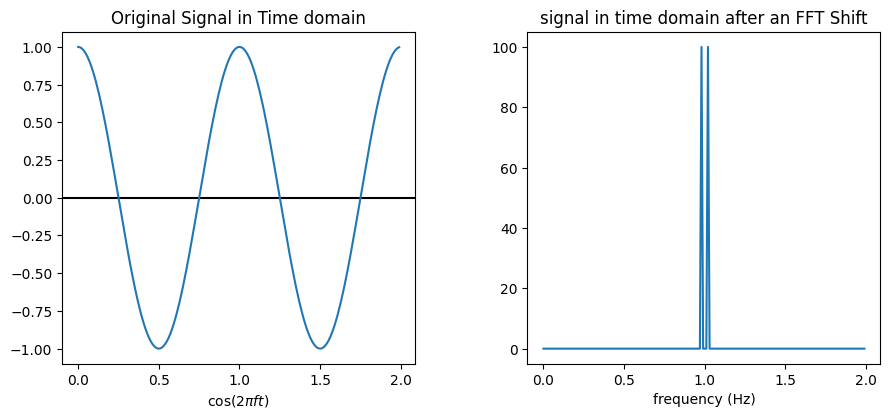

In [25]:
# add some examples like this: https://pysdr.org/content/frequency_domain.html#time-frequency-pairs

time = np.arange(0, 2, 0.01)
signal = np.cos(2 * np.pi * time)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=5)
ax1.axhline(color='black')
ax1.plot(time, signal)
# FIXME: how render latex with python strings?
ax1.set(title='Original Signal in Time domain', xlabel=r'$\cos(2 \pi ft)$')

# FIXME: what is that separation in the spike around 1Hz
signal_freq_domain = np.fft.fftshift(np.fft.fft(signal))
ax2.plot(time, signal_freq_domain)
ax2.set(title='signal in time domain after an FFT Shift', xlabel='frequency (Hz)')

### Fourier Properties
1. **Linearity:** 
    * if two signals are added in the time domain, then they are also added in the frequency domain.
    * if a signal in the time domain is multiplied, then it will scaled by the same amount in the frequency domain.

2. **Frequency Swift:** when a signal $x(t)$ is multiplied by $sin(t)$ in the time domain, then the signal is switfted by the frequency of the sine wave.


In [3]:
# add plot of example of frequency swift

3. **Scaling in Time:** scaling a signal $x(t)$ in the time domain will result in reverse scaling in the frequency domain

4. **Convolution in Time Domain:** 
    > convolution is an integral that expresses the amount of overlap of one function as it is shifted other another

    convolution is like cross-corrlation, when they are convoluted, a 3rd signal is created from them

5. **Convolution in the Frequency Domain:** the inverse of convolution in the time domain.

## Fast Fourier Transform (FFT)
Implemantation for discrete Fourier Transform, it has one input and one output.

> negative frequencies aren't actually negative, they are just represented a being to the left of the center frequency

The FFT mixes around the input signal to form the output, and changing the order things happen in the time domain won't change the frequency componets of the signals.

In [4]:
# plot two plots like this https://pysdr.org/_images/fft_signal_order.png
# https://pysdr.org/content/frequency_domain.html#order-in-time-doesn-t-matter


[Text(0.5, 1.0, 'phase plot frequency domain'),
 Text(0.5, 80.7222222222222, 'frequency (Hz)')]

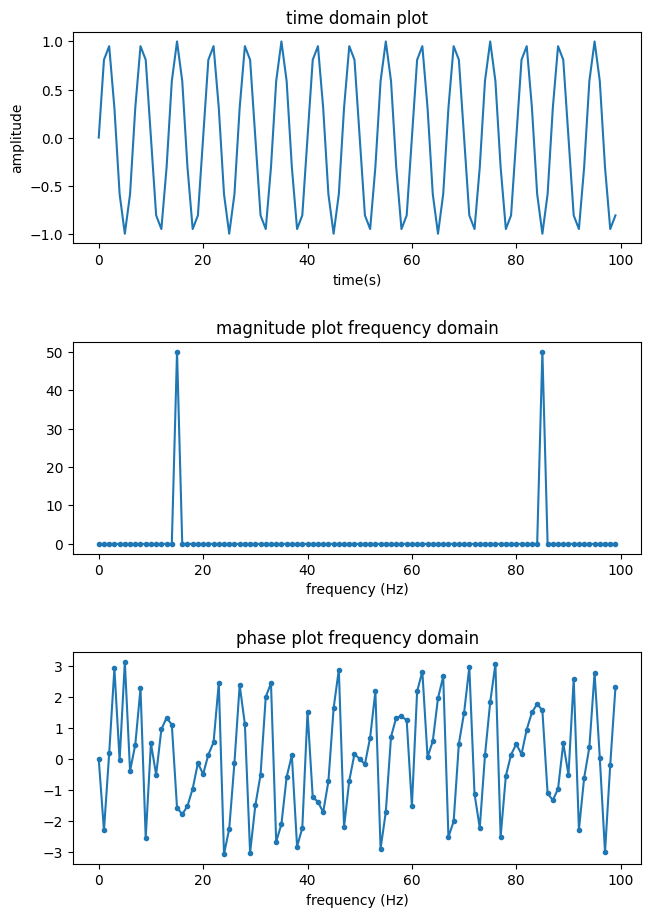

In [5]:
x = np.arange(100)
y = np.sin(0.15 * 2 * np.pi * x)

z = np.fft.fft(y)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7.5, 10))
fig.tight_layout(pad=5)

plt.title('plots for cosine wave')
ax1.plot(x,y)
ax1.set(title='time domain plot', xlabel='time(s)', ylabel='amplitude')

ax2.plot(x, np.abs(z),'.-')
ax2.set(title='magnitude plot frequency domain', xlabel='frequency (Hz)')

ax3.plot(x, np.angle(z),'.-')
ax3.set(title='phase plot frequency domain', xlabel='frequency (Hz)')


Recommended to calculate the magnitude and the phase after getting the **FFT**

It's also recommended to place 0 Hz (DC) in the center and negative frequencies to the left, so after doing an **FFT**, also perform a **FFT shift**

[Text(0.5, 1.0, 'phase after FFT Shift'),
 Text(0.5, 53.2222222222222, 'frequency (Hz)')]

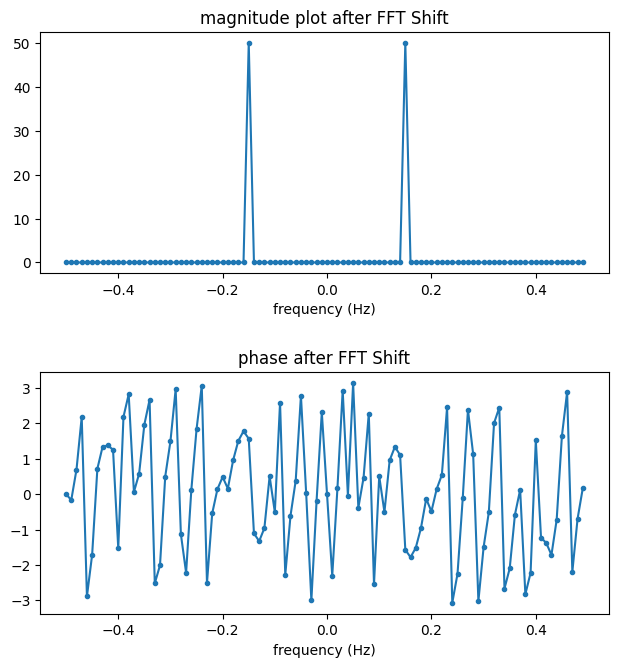

In [6]:
new_z = np.fft.fftshift(np.fft.fft(y))
frq = np.arange(1/-2, 1/2, 1/100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.5, 7.5))
fig.tight_layout(pad=5)

# also plot with frq instead of x
ax1.plot(frq, np.abs(new_z),'.-')
ax1.set(title='magnitude plot after FFT Shift', xlabel='frequency (Hz)')

ax2.plot(frq, np.angle(new_z),'.-')
ax2.set(title='phase after FFT Shift', xlabel='frequency (Hz)')

A spike is detected at 0.15 Hz since that is the frequency used to create the sine wave.

### Windowing
Due to the theory behind fourier transform, the FFT will treat the samples as periodic signal, with the first and last samples being connected. In reality, the first and last samples aren't connected, and the transistion in the time domain could look like several frequencies.

Doing an FFT on a 100 samples stored in `x`, it recommended that `x[0]` and `x[99]` are equal or close in value.

To make up for this, **windowing** can be used. Right before the FFT, multiply the slice of a signal by a window function, which will tapers to zero on both the beginning and end.

Not applying windowing is called using  a **rectangular window** since it's like multiplying by an array of 1's.



In [7]:
# try one of these: https://pysdr.org/content/frequency_domain.html#windowing
# plot difference between windowing and not windowing

### FFT Sizing
Most common FFT size is order of 2. Using an order larger than 2 will be slower.

For signals with millions of samples, the signal will be broken up and several FFTs will be performed, then the ouptus are averaged and plotted over time.

### Spectrogram/Waterfall
It's a plot that shows frequency over time. It is made of a bunch of FFTs stacked together

[Text(0.5, 1.0, 'spectrogram plot'),
 Text(0.5, 53.2222222222222, 'frequenecy (MHz)'),
 Text(56.472222222222214, 0.5, 'time (s)')]

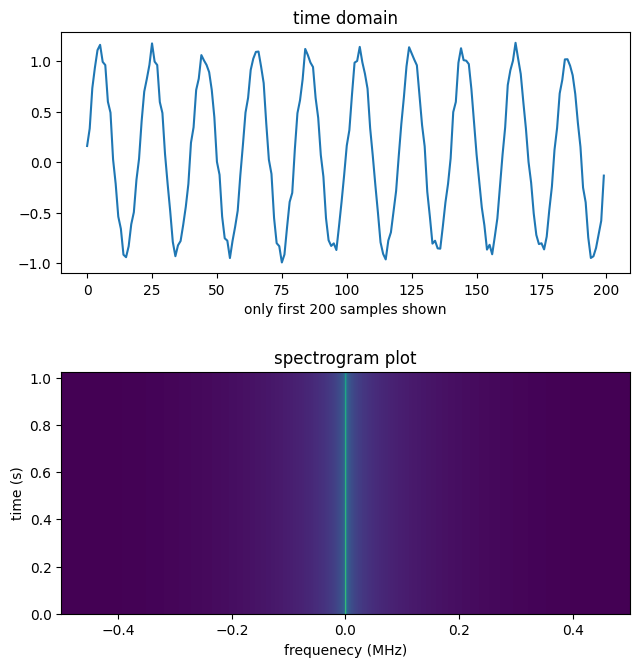

In [8]:
# example spectrogram

# create sample signal
samp_rate = 1e6
fft_size = 1024

time = np.arange(fft_size * 1000) / samp_rate
frq_tone = 50e3
signal = np.sin(2 * np.pi * frq_tone * time) + (0.2 * np.random.rand(len(time)))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.5, 7.5))
fig.tight_layout(pad=5)
ax1.plot(signal[0:200])
ax1.set(title='time domain', xlabel='only first 200 samples shown')

# create spectrogram
num_rows = len(signal) // fft_size
spectrogram = np.zeros((num_rows, fft_size))

for i in range(num_rows):
    fourier = np.fft.fftshift(np.fft.fft(time[i * fft_size:(i + 1) * fft_size]))
    spectrogram[i,:] = np.log10(np.abs(fourier) ** 2)

ax2.imshow(spectrogram, aspect='auto', extent=[samp_rate/-2/1e6, samp_rate/2/1e6, 0, len(signal)/samp_rate])
ax2.set(title='spectrogram plot', xlabel='frequenecy (MHz)', ylabel='time (s)')

### FFT Implementation
Implementation of Cooley-Turkey algorithm. It's an order 2 FFT, consisting of 2 multiplies and 2 summations



In [9]:
# fft definition
def fft(x):
    x_length = len(x)
    if x_length == 1:
        return x

    twiddle_factors = np.exp(-2j * np.pi * np.arange(x_length//2) / x_length)
    x_even = fft(x[::2])
    x_odd = fft(x[1::2])

    result = np.concatenate([x_even + twiddle_factors * x_odd, x_even - twiddle_factors * x_odd])

    return result

[Text(0.5, 0, 'frequency [MHz]'), Text(0, 0.5, 'magnitude [dB]')]

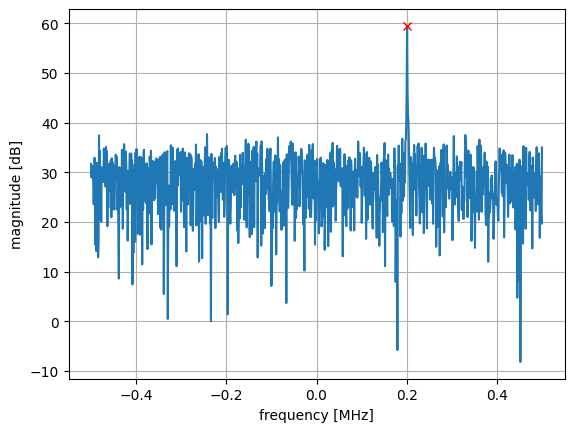

In [10]:
# tone + noise simulation
samp_rate = 1e6
f_offset = 0.2e6
size = 1024

time = np.arange(size) / samp_rate
main_signal = np.exp(2j * np.pi * f_offset * time)
noise = (np.random.randn(size) + 1j * np.random.randn(size)) / np.sqrt(2)
signal = main_signal + noise

# perform fft and fft shift, convert to dB
result_signal = fft(signal)
signal_shifted = np.roll(result_signal, size // 2)
signal_mag = 10 * np.log10(np.abs(signal_shifted) ** 2)

freq = np.linspace(samp_rate / -2, samp_rate / 2, size) / 1e6
fig, axis = plt.subplots()
axis.grid()
axis.plot(freq, signal_mag)
axis.plot(freq[np.argmax(signal_mag)], np.max(signal_mag), 'rx')
axis.set(xlabel='frequency [MHz]', ylabel='magnitude [dB]')

## Convolution
Convolution is an integral that expresses the amount of overlap of one function as it is shifted other another. convolution is like cross-corrlation, when they are convoluted, a 3rd signal is created from them.


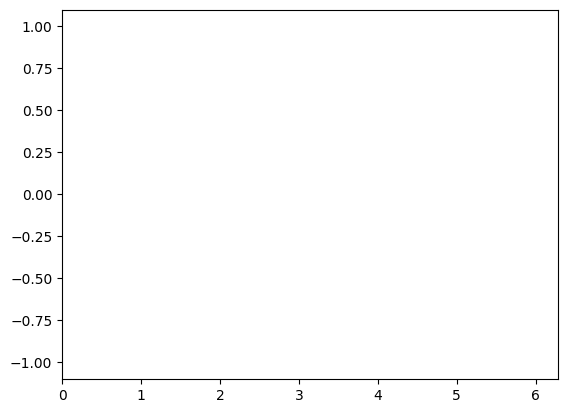

In [11]:
# source: https://towardsdatascience.com/matplotlib-animations-in-jupyter-notebook-4422e4f0e389
#%matplotlib widget

fig, ax = plt.subplots()

line, = ax.plot([])

ax.set(xlim=(0, 2*np.pi), ylim=(-1.1, 1.1))

def animate(frame_num):
    y = np.sin(x + 2*np.sin * frame_num/100)
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=5)
plt.show()


The output of convolution is the integral as two signals slide across one another, the length of the output is actually longer than the inputs. If signal 1 is $M$ samples and signal 2 $N$ samples, then the result can produce output with length $M + N - 1$

The mathematical equation for convolution: $$(f * g)(t)  =  \int{f(\tau)g(t - \tau)}d\tau$$
$g(t)$ is the signal that slides accross signal 2 $f(t)$, their order doesn't matter, but $g(t)$ is usually the shorter array.
